## Gemini  Quickstart with Python

### Set Up and Configure

In [1]:
#Set up API
with open('secrete.txt', 'r') as file:
    Api_key = file.read().strip()

In [4]:
import google.generativeai as genai
import os
genai.configure(api_key= Api_key)

### List models

In [5]:
for m in genai.list_models():
      if 'generateContent' in m.supported_generation_methods:
        print(m.name)


models/gemini-pro
models/gemini-pro-vision


### Generate text from text inputs

In [6]:
# For text-only prompts we use the gemini-pro model
genai.configure(api_key= Api_key)
model = genai.GenerativeModel('gemini-pro')

In [7]:
response = model.generate_content("What is LangChain?")
print(response.text)

LangChain is a startup company specializing in providing language data services. It offers a wide range of services, including data collection, data labeling, and data annotation. LangChain also provides language training and language quality control services. The company has a team of experienced linguists and data scientists who are dedicated to providing high-quality data and services.

LangChain's data collection services include collecting data from various sources, such as the web, social media, and user-generated content. The company also provides data labeling and annotation services, which involve assigning labels or tags to data. These labels or tags can be used to train machine learning models. LangChain uses a variety of techniques to collect and annotate data, including crowdsourcing, active learning, and semi-supervised learning.

LangChain's data training services include training models for various natural language processing (NLP) tasks, such as machine translation, la

### Generate text from image and text inputs

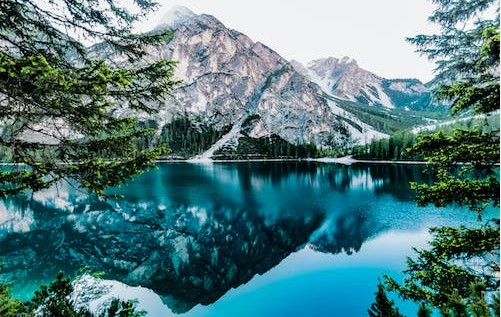

In [12]:
import PIL.Image

img = PIL.Image.open('image.jpg')
img

In [13]:
model = genai.GenerativeModel('gemini-pro-vision')
response = model.generate_content(["Descibe pivture", img], stream=True)
response.resolve()
print(response.text)

 The picture shows a beautiful mountain lake. The water is calm and clear, reflecting the sky and the mountains. The mountains are covered in snow. The trees are green and lush. The picture is very peaceful and serene.


### ChatBot

In [14]:
model = genai.GenerativeModel('gemini-pro')
chat = model.start_chat(history=[])

In [20]:
while True:
    message = input("You: ")
    
    if message.lower() == 'exit':
        print("Bye!")
        break
    
    response = chat.send_message(message)
    print("Gemini: " + response.text)


You: Good morning
Gemini: Good morning to you too! I hope you woke up feeling refreshed and ready to embrace the day. As the sun casts its golden rays, may your morning be filled with positivity, productivity, and a sense of purpose. Whether you have a busy schedule or a more relaxed day ahead, I wish you a wonderful morning and a fantastic day overall. Take some time to enjoy the simple pleasures of life, whether it's savoring a warm cup of coffee, listening to your favorite music, or simply appreciating the beauty of nature. Have a magnificent morning, and may the rest of your day be filled with success and joyful moments!
You: exit
Bye!


In [23]:
messages = []

while True:
    message = input('you:')
    messages.append({
        'role': 'user',
        'parts': [message],
    })
    
    if message.lower() == 'exit':
        print("Bye!")
        break

    response = model.generate_content(messages)
    messages.append({
        'role': 'model',
        'parts': [response.text],
    })

    print('Gemini: ' + response.text)
 

you:Good Morining
Gemini: Good morning! How can I help you today? Is there anything specific you would like to ask me or learn about? 

Whether you're looking for information, want to have a casual conversation, or need assistance with a task, I'm here to help. Just let me know what's on your mind and I'll do my best to provide you with accurate, helpful, and engaging responses.
you:exit
Bye!


# LangChain Quickstart

In [25]:
from langchain_google_genai import ChatGoogleGenerativeAI
import os
GOOGLE_API_KEY = Api_key
os.environ["GOOGLE_API_KEY"] = GOOGLE_API_KEY

In [26]:
from langchain_google_genai import ChatGoogleGenerativeAI
llm = ChatGoogleGenerativeAI(model="gemini-pro")

### Simple sequential Chain

In [30]:
from langchain.prompts import PromptTemplate

template1 = """
I want to open Clothe shop in {country}.Suggest a  name for this.
"""

template2 = """
Suggest city in that {country} .Return it as a comma separated list.
"""

prompt1 = PromptTemplate(
    input_variables=["country"],
    template=template1,
)

prompt2=PromptTemplate(
    input_variables=["city"],
    template=template2,
)

In [31]:
from langchain.chains import LLMChain
name_chain=LLMChain(llm=llm,prompt=prompt1)
food_item_chain=LLMChain(llm=llm,prompt=prompt2)

In [33]:
from langchain.chains import SimpleSequentialChain
chain= SimpleSequentialChain(chains=[name_chain,food_item_chain])
response=chain.run("Nepal")
print(response)

Kathmandu


### ## Sequential Chain

In [34]:
from langchain.prompts import PromptTemplate

template1 = """
I want to open resturant for {cuisine} food.Suggest a fancy name for this.
"""

template2 = """
Suggest some menu items for {cuisine} food.Return it as a comma separated list.
"""

prompt1 = PromptTemplate(
    input_variables=['cuisine'],
    template=template1,
)

prompt2=PromptTemplate(
    input_variables=['resturant_name'],
    template=template2,
)

In [35]:
from langchain.chains import LLMChain
name_chain=LLMChain(llm=llm,prompt=prompt1,output_key="resturant_name")
food_item_chain=LLMChain(llm=llm,prompt=prompt2,output_key="menu_items")

In [36]:
from langchain.chains import SequentialChain
chain=SequentialChain(
    chains=[name_chain,food_item_chain],
    input_variables=['cuisine'],
    output_variables=['resturant_name','menu_items']
)
chain({'cuisine':'Nepali'})

C:\Users\pokhr\AppData\Local\Programs\Python\Python311\Lib\site-packages\langchain_core\_api\deprecation.py:117: LangChainDeprecationWarning: The function `__call__` was deprecated in LangChain 0.1.0 and will be removed in 0.2.0. Use invoke instead.
  warn_deprecated(


{'cuisine': 'Nepali',
 'resturant_name': '1. Namaste Nepal: This name is a warm greeting in Nepali that welcomes guests, symbolizing the friendly and hospitable nature of Nepali cuisine.\n\n2. The Everest Kitchen: The Everest, the tallest peak in the world, is a symbol of Nepal\'s natural beauty and grandeur. This name evokes the authenticity and breathtaking flavors of Nepali food.\n\n3. Himalayan Delicacies: The Himalayas, the majestic mountain range that stretches through Nepal, inspires awe and wonder. This name highlights the unique and tantalizing flavors of Nepali cuisine, derived from fresh and locally sourced ingredients.\n\n4. Saffron & Spices: Saffron and exotic spices are quintessential ingredients in Nepali cooking. This name highlights the aromatic and flavorful nature of Nepali dishes, promising an unforgettable culinary experience.\n\n5. Chulo by the River: Chulo refers to the traditional Nepali stove used for cooking, while "by the river" evokes a serene and tranquil s